IMPORTING LIBBARIES

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__


'2.5.0'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Training set
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/TRAINING',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 125 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/TEST',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 22 images belonging to 2 classes.


CREATING MODEL

In [ ]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


FIT THE MODEL

In [ ]:
  cnn.fit_generator(training_set ,
                  epochs = 25,
                  validation_data = test_set,
                  validation_steps = 334)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
4/4 [==============================] - 32s 7s/step - loss: 0.9731 - accuracy: 0.5280 - val_loss: 0.7756 - val_accuracy: 0.5455
Epoch 2/25
4/4 [==============================] - 2s 475ms/step - loss: 0.7405 - accuracy: 0.4720
Epoch 3/25
4/4 [==============================] - 2s 491ms/step - loss: 0.6309 - accuracy: 0.6160
Epoch 4/25
4/4 [==============================] - 2s 474ms/step - loss: 0.6001 - accuracy: 0.7040
Epoch 5/25
4/4 [==============================] - 2s 484ms/step - loss: 0.5529 - accuracy: 0.7600
Epoch 6/25
4/4 [==============================] - 2s 465ms/step - loss: 0.4736 - accuracy: 0.8320
Epoch 7/25
4/4 [==============================] - 2s 502ms/step - loss: 0.4690 - accuracy: 0.8240
Epoch 8/25
4/4 [==============================] - 2s 467ms/step - loss: 0.4042 - accuracy: 0.8240
Epoch 9/25
4/4 [==============================] - 2s 322ms/step - loss: 0.3597 - accuracy: 0.8480
Epoch 10/25
4/4 [==============================] - 2s 459ms/step - loss: 0.385

In [ ]:
from IPython.display import display
from PIL import Image

SEEING THE RESULT

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('/content/drive/My Drive/dataset/TEST/Aadhar/images.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
#print(result)
training_set.class_indices
if result[0][0]>0.5:
  prediction= 'Others'
else:
  prediction='aadhar'
print(prediction)

aadhar


TRYING USING matchTemplate


In [ ]:
import numpy as np
import argparse
import imutils
import glob
import cv2

In [ ]:
from google.colab.patches import cv2_imshow
template = cv2.imread('/content/drive/My Drive/dataset/TRAINING/Aadhar/Printing-PVC-Plastic-Aadhaar-Card (2).jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2_imshow( template)


In [ ]:
image = cv2.imread('/content/drive/My Drive/dataset/TRAINING/Aadhar/aadhar32.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
found = None

In [ ]:
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
	# resize the image according to the scale, and keep track
	# of the ratio of the resizing
	resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
	r = gray.shape[1] / float(resized.shape[1])

	# if the resized image is smaller than the template, then break
	# from the loop
	if resized.shape[0] < tH or resized.shape[1] < tW:
		break
	# detect edges in the resized, grayscale image and apply template
	# matching to find the template in the image
	edged = cv2.Canny(resized, 50, 200)
	result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF_NORMED)
	(_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
	print(maxVal)
	if maxVal > 0.2:
		#print("hi",maxVal)
		if found is None or maxVal > found[0]:
			found = (maxVal, maxLoc, r)
	 
		# if we have found a new maximum correlation value, then ipdate
		# the bookkeeping variable
		#if found is None or maxVal > found[0]:
		#	found = (maxVal, maxLoc, r)


0.2614586055278778
0.21923190355300903
0.23087576031684875
0.196525439620018
0.16309787333011627


Aadhar


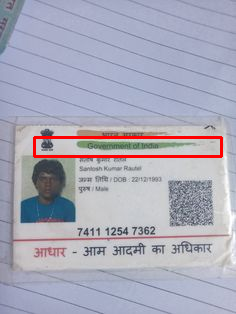

In [ ]:
from google.colab.patches import cv2_imshow
if found!=None:
  print("Aadhar")
  (_, maxLoc, r) = found
  (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
  (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

    # draw a bounding box around the detected result and display the image
  cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
  cv2_imshow( image)
  cv2.waitKey(0)
else:
  print("Others")